In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qdlutils.hardware.nidaq.synchronous.nidaqsequencer import NidaqSequencer
from qdlutils.hardware.nidaq.synchronous.nidaqsequencerinput import *
from qdlutils.hardware.nidaq.synchronous.nidaqsequenceroutput import *

In [32]:
inputs = {
    'ai_voltage' : NidaqSequencerAIVoltage(
            name = 'ai_voltage',
            device = 'Dev1',
            channel = 'ai1',
    ),
    'ci_edge' : NidaqSequencerCIEdge(
            name = 'ci_edge',
            device = 'Dev1',
            channel = 'ctr2',
            terminal = 'PFI0',
    )
}

outputs = {
    'ao_voltage' : NidaqSequencerAOVoltage(
            name = 'ao_voltage',
            device = 'Dev1',
            channel = 'ao3',
            min_voltage = -3,
            max_voltage = 5
    ),
}

sequencer1 = NidaqSequencer(
        inputs= inputs,
        outputs=outputs,
        clock_device = 'Dev1',
        clock_channel = 'port0'
)

In [33]:
# Scan parameters
n_scans = 10

# Number of samples in the sequence
n_samples = 400

# Total sequence time in seconds
scan_time = 30

# Start and stop voltage of the sweep
start_voltage = 0.8
stop_voltage = 1.2

In [34]:
# Compute the remaining parameters and run the sequences

# Rate of samples per second
sample_rate = n_samples / scan_time
# Generate the data
voltages = np.linspace(start_voltage,stop_voltage, n_samples)
# Save in a dictionary to configure the sequencer
output_data = {'ao_voltage' : voltages}
# Input settings
input_samples = {
    'ai_voltage' : n_samples,
    'ci_edge': n_samples
}
readout_delays = {
    'ai_voltage' : 0,
    'ci_edge' : 0
}
soft_starts = {
    'ao_voltage' : True,
}

In [35]:
# Lists to save the data in
pd_voltages = []
counts = []
for i in range(n_scans):
    # Run the sequence
    sequencer1.run_sequence(
        clock_rate = sample_rate,
        output_data = output_data,
        input_samples = input_samples,
        readout_delays = readout_delays,
        soft_start = soft_starts
    )
    # Save the results
    results = sequencer1.get_data(inputs=True, outputs=False)
    pd_voltages.append( results['ai_voltage'] )
    counts.append( np.diff(results['ci_edge'], prepend=0) * sample_rate )

pd_voltages = np.array(pd_voltages)
counts = np.array(counts)

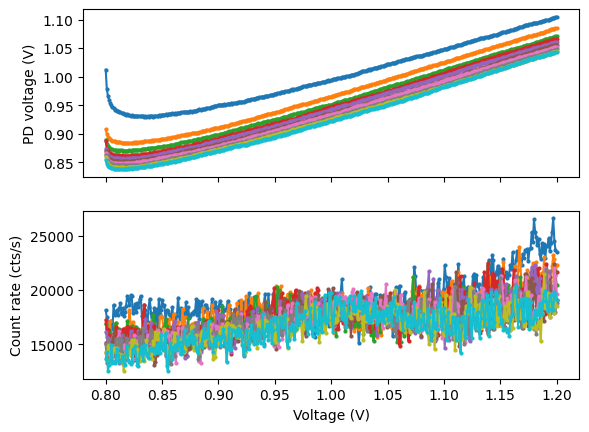

In [36]:
# Plot the results
fig, ax = plt.subplots(2,1, sharex=True)
for i in range(n_scans):
    ax[0].plot(voltages, pd_voltages[i], 'o-', markersize=2)
    ax[1].plot(voltages, counts[i], 'o-', markersize=2)
ax[1].set_xlabel('Voltage (V)')
ax[0].set_ylabel('PD voltage (V)')
ax[1].set_ylabel('Count rate (cts/s)')
plt.show()

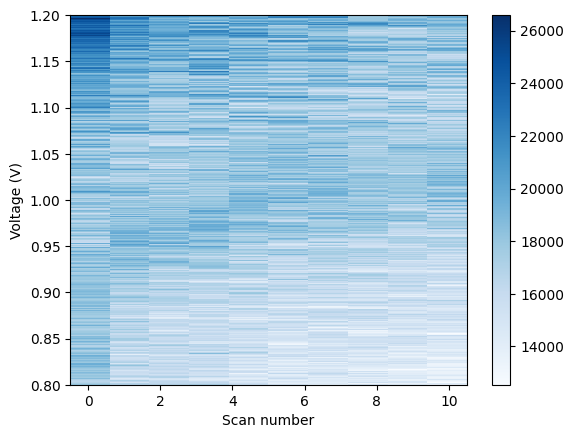

In [37]:
im = plt.imshow(
    counts.T, extent=[-0.5, n_scans+0.5, voltages[0], voltages[-1]], 
    origin='lower', interpolation='none', cmap='Blues', aspect='auto'
)
plt.colorbar(im)
plt.xlabel('Scan number')
plt.ylabel('Voltage (V)')
plt.show()

In [38]:
# Save data as pickle for now...
import pickle
with open('dit_cvd3-p11-b-dev02_narrow_range_2.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
inputs = {
    'ai_voltage' : NidaqSequencerAIVoltage(
            name = 'ai_voltage',
            device = 'Dev1',
            channel = 'ai1',
    ),
    'ci_edge' : NidaqSequencerCIEdge(
            name = 'ci_edge',
            device = 'Dev1',
            channel = 'ctr2',
            terminal = 'PFI0',
    )
}

outputs = {
    'ao_voltage' : NidaqSequencerAOVoltage(
            name = 'ao_voltage',
            device = 'Dev1',
            channel = 'ao3',
            min_voltage = -3,
            max_voltage = 5
    ),
}

sequencer2 = NidaqSequencer(
        inputs= inputs,
        outputs=outputs,
        clock_device = 'Dev1',
        clock_channel = 'port0'
)

In [3]:
# Scan parameters
n_scans = 10

# Number of samples in the sequence
n_samples = 3200

# Total sequence time in seconds
scan_time = 320

# Start and stop voltage of the sweep
start_voltage = -3
stop_voltage = 5

In [4]:
# Compute the remaining parameters and run the sequences

# Rate of samples per second
sample_rate = n_samples / scan_time
# Generate the data
voltages = np.linspace(start_voltage,stop_voltage, n_samples)
# Save in a dictionary to configure the sequencer
output_data = {'ao_voltage' : voltages}
# Input settings
input_samples = {
    'ai_voltage' : n_samples,
    'ci_edge': n_samples
}
readout_delays = {
    'ai_voltage' : 0,
    'ci_edge' : 0
}
soft_starts = {
    'ao_voltage' : True,
}

In [5]:
# Lists to save the data in
pd_voltages = []
counts = []
for i in range(n_scans):
    # Run the sequence
    sequencer2.run_sequence(
        clock_rate = sample_rate,
        output_data = output_data,
        input_samples = input_samples,
        readout_delays = readout_delays,
        soft_start = soft_starts,
        timeout=320 * 11
    )
    # Save the results
    results = sequencer2.get_data(inputs=True, outputs=False)
    pd_voltages.append( results['ai_voltage'] )
    counts.append( np.diff(results['ci_edge'], prepend=0) * sample_rate )

pd_voltages = np.array(pd_voltages)
counts = np.array(counts)

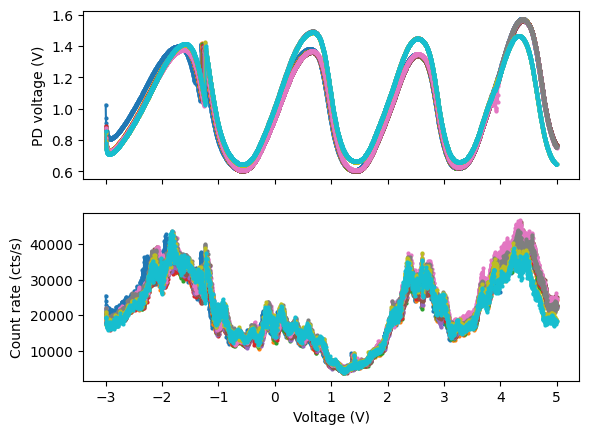

In [23]:
# Plot the results
fig, ax = plt.subplots(2,1, sharex=True)
for i in range(n_scans):
    ax[0].plot(voltages, pd_voltages[i], 'o-', markersize=2)
    ax[1].plot(voltages, counts[i], 'o-', markersize=2)
ax[1].set_xlabel('Voltage (V)')
ax[0].set_ylabel('PD voltage (V)')
ax[1].set_ylabel('Count rate (cts/s)')
#ax[0].set_xlim(1,2)
#ax[1].set_ylim(0,15000)
plt.show()

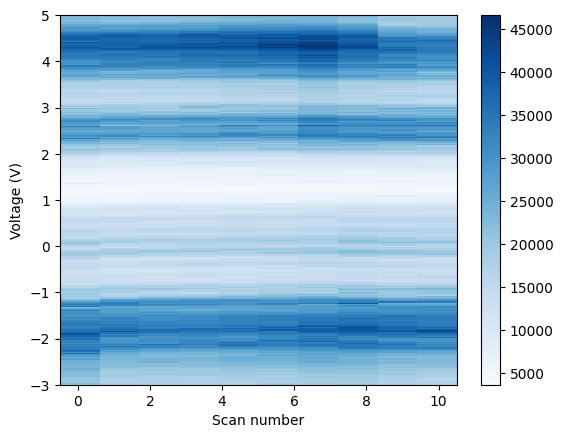

In [7]:
im = plt.imshow(
    counts.T, extent=[-0.5, n_scans+0.5, voltages[0], voltages[-1]], 
    origin='lower', interpolation='none', cmap='Blues', aspect='auto'
)
plt.colorbar(im)
plt.xlabel('Scan number')
plt.ylabel('Voltage (V)')
plt.show()

In [9]:
import pickle
with open('dit_cvd3-p11-b-dev02_full_range_1.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

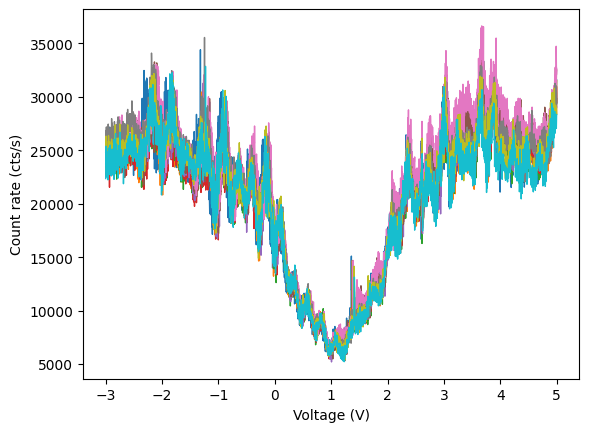

In [15]:
# Plot the results
fig, ax = plt.subplots(1,1, sharex=True)
for i in range(n_scans):
    ax.plot(voltages, counts[i] / pd_voltages[i], '-', linewidth=1,markersize=2)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('PD voltage (V)')
ax.set_ylabel('Count rate (cts/s)')
#ax[0].set_xlim(1,2)
#ax[1].set_ylim(0,15000)
plt.show()

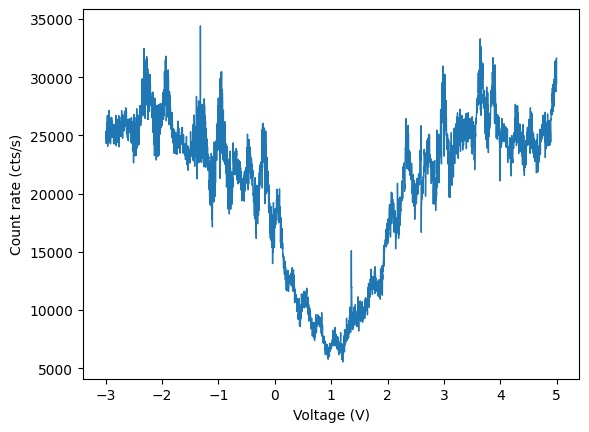

In [22]:
# Plot the results
fig, ax = plt.subplots(1,1, sharex=True)
ax.plot(voltages, counts[0] / pd_voltages[0], '-', linewidth=1,markersize=2)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('PD voltage (V)')
ax.set_ylabel('Count rate (cts/s)')
#ax.set_xlim(1,2)
#ax[1].set_ylim(0,15000)
plt.show()

In [35]:
import h5py
with h5py.File('dit_cvd3-p11-b-dev02_full_range_1.hdf5', 'w') as f:
    f.create_dataset('voltages', data = np.array(voltages))
    f.create_dataset('pdsignal', data = np.array(pd_voltages))
    f.create_dataset('counts', data = np.array(counts))

In [25]:
with open('dit_cvd3-p11-b-dev02_full_range_1.p', 'rb') as f:
    d = pickle.load(f)

In [28]:
d.keys()

dict_keys(['ai_voltage', 'ci_edge'])

In [29]:
y1 = d['ai_voltage'][0]
y2 = np.append( np.diff(d['ai_voltage'][0], prepend=0) * sample_rate )

ValueError: diff requires input that is at least one dimensional

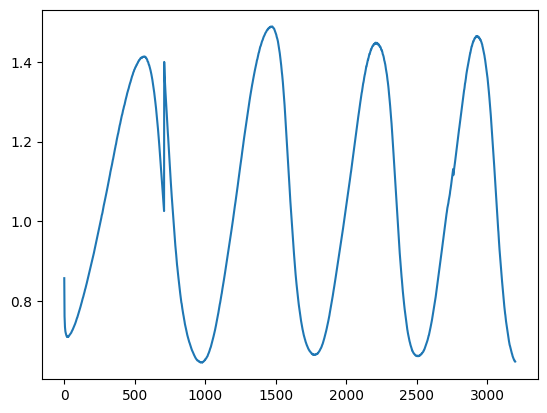

In [33]:
plt.plot(d['ai_voltage'])

In [36]:
with h5py.File('dit_cvd3-p11-b-dev02_full_range_1.hdf5', 'r') as f:
    x = np.array(f['voltages'])
    y1 = np.array(f['pdsignal'])
    y2 = np.array(f['counts'])

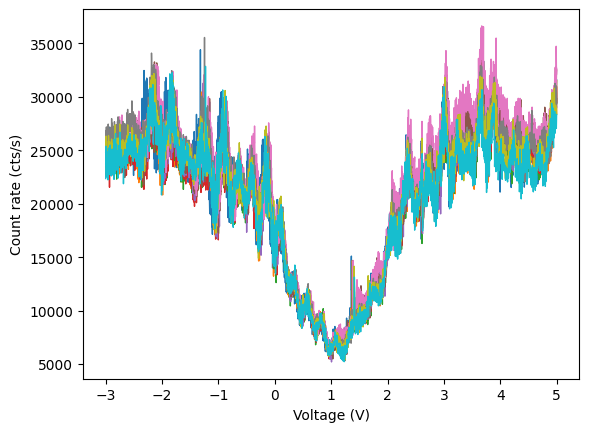

In [37]:
# Plot the results
fig, ax = plt.subplots(1,1, sharex=True)
for i in range(n_scans):
    ax.plot(x, y2[i] / y1[i], '-', linewidth=1,markersize=2)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('PD voltage (V)')
ax.set_ylabel('Count rate (cts/s)')
#ax[0].set_xlim(1,2)
#ax[1].set_ylim(0,15000)
plt.show()